### 하단 가위바위보 분류 결과 ###
- 최고 accuracy 0.38 (가장 하단)
- 여러번 바꿔봐도 0.33 이 나옴. 
- 예상 사유: 내 train 데이터는 얼굴 없이 손만 찍었는데, 경애님은 얼굴과 함께 찍으셨기 때문에 
            모든 예측값이 1(바위)로 나오기 때문에 33%로 예상됨.
- 중간에 0.36이 나오기도 함(동일 수치로 다시 돌리니 다시 0.33으로 변했고 재현 불가) 
- epoch를 200으로 해서 돌리니 0.22가 나오기도 했는데 과적합이 심해져서라고 예상됨, 그런데 모든 test 데이터가 1:1:1로 균일한데 0.22가 나올 수 있는 건지..? 의아함. loss의 영향을 받는 것일까..?        
  -> 아무리 바꿔도 pred가 모두 1(바위)로 나왔었기 때문에 0.22가 이상했는데, pred에 1이 아닌 숫자가 발생했음.
- 점수를 올리기 위해서는 test 데이터도 손만 찍은 것으로 진행해야할듯함.
- 앞선 숫자 분류에서는 fit과 pred 시 shape과 norm이 된 x_train_reshaped로 fit과 pred를 했는데,    
  가위바위보 에서는 왜 3채널만 반영된 x_train으로 학습/예측을 하는 것인지 불분명함.
- LMS에 올려있는 "손만 찍힌 사진" test 데이터를 다운로드하여 test 했을 시에도 동일하게 0.33이 나옴!! 
- 얼굴과 함께 찍힌 게 문제가 아니었다니 충격임..

**추가 개선 방안**
- 교차 검증 (과적합 개선)
- 데이터의 양 또는 질을 늘리는 것
- 레이어구조 개선
- 파라미터 튜닝 개선 가능 수치는 최대 20%로 예상

## 딥러닝 - 숫자 손글씨 분류

#### 데이터 준비

In [236]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)

mnist = keras.datasets.mnist # 숫자 손글씨 데이터베이스=MNIST

(x_train, y_train), (x_test, y_test) = mnist.load_data() # 다운로드 및 로드

print(len(x_train)) # x_train 배열의 크기 출력

2.19.0
60000


In [237]:
print(x_train.shape, x_test.shape)  # 총 7만장의 손글씨 이미지

(60000, 28, 28) (10000, 28, 28)


In [238]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [239]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [240]:
x_train[0,7]

array([  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
       253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
         0,   0], dtype=uint8)

In [241]:
 # 학습용 데이터(training set)은 대략 몇명의 손글씨 : 250 → 어떻게 알아내지?

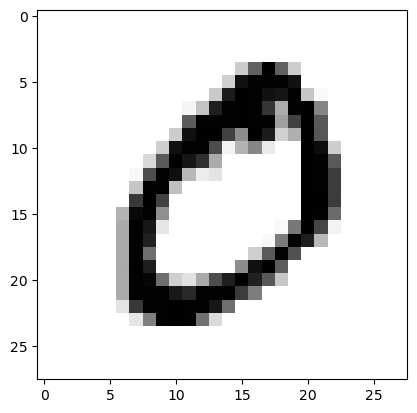

In [242]:
# 이미지 출력

plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

In [243]:
print(y_train[1])

0


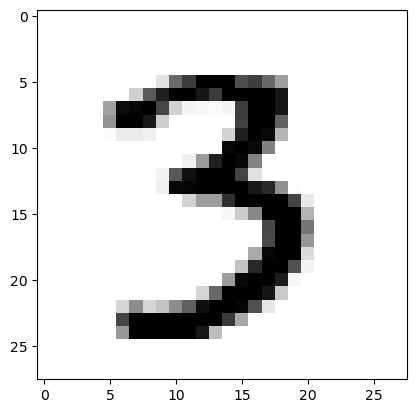

10001 번째 이미지의 숫자는 바로 3 입니다.


In [244]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로', y_train[index], '입니다.')

In [245]:
print('최소값:',np.min(x_train), '최대값:',np.max(x_train))
print('최소값:',np.min(x_test), '최대값:',np.max(x_test))

최소값: 0 최대값: 255
최소값: 0 최대값: 255


In [246]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), '최대값:',np.max(x_train_norm))  
print('최소값:',np.min(x_test_norm), '최대값:',np.max(x_test_norm))  

최소값: 0.0 최대값: 1.0
최소값: 0.0 최대값: 1.0


In [247]:
x_train_norm[0,7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.19215686, 0.93333333, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.98431373, 0.36470588, 0.32156863,
       0.32156863, 0.21960784, 0.15294118, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

#### 딥러닝 네트워크 설계

In [248]:
# tf.keras의 Sequential API 이용하여 LeNet이라는 딥러닝 네트워크를 설계

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28,1))) # 이미지사이즈+차원수(채널수, 흑백은 1, RGB 3)
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('model에 추가된 layer 개수:', len(model.layers))

model에 추가된 layer 개수: 7


In [249]:
model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_32 (Flatten)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,762 (120.16 KB)

 Trainable params: 30,762 (120.16 KB)

 Non-trainable params: 0 (0.00 B)

#### 딥러닝 네트워크 학습시키기

In [250]:
print(f"Before Reshape - x_train_norm_shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1) # 데이터갯수에 -1을 쓰면 reshape시 자동 계산
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_norm_shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_norm shape: {x_test_reshaped.shape}")


Before Reshape - x_train_norm_shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_norm_shape: (60000, 28, 28, 1)
After Reshape - x_test_norm shape: (10000, 28, 28, 1)


In [251]:
arr = np.arange(12)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [252]:
arr.reshape(-1, 3) # -1을 통해 자동으로 4개 행이 계산되어 결과가 4, 3이 됨. 즉 -1가 4를 자동 계산하는 것

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [253]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8721 - loss: 0.4129
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9806 - loss: 0.0634
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9857 - loss: 0.0444
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9893 - loss: 0.0339
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9916 - loss: 0.0257
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9931 - loss: 0.0209
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9936 - loss: 0.0194
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9952 - loss: 0.0154
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9962 - loss: 0.0129
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9965 - loss: 0.0119


In [254]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
# verbose 0 출력X, 1 정보 상세하게 출력, 2 정보 함축 출력
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 1s - 2ms/step - accuracy: 0.9887 - loss: 0.0428
test_loss: 0.04276471957564354
test_accuracy: 0.9886999726295471


In [255]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=1)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9839 - loss: 0.0614
test_loss: 0.04276471957564354
test_accuracy: 0.9886999726295471


In [256]:
predicted_result = model.predict(x_test_reshaped) # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1) 
# argmax 주어진 np 배열에서 가장 높은 값 인덱스 반환, axis 0 열 축에서 1은 행 축에서
# 즉, 인덱스 0의 첫번째 숫자를 맞추기 위해 한 행에 10개의 숫자가 표시되는데, 그 행에서 가장 크기가 큰 인덱스를 반환
idx=0 # 첫번째 숫자
print('model.predict() 결과: ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과: ', predicted_labels[idx])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
model.predict() 결과:  [5.8473725e-12 1.4358288e-10 1.3527598e-07 2.1340838e-07 1.9771050e-13
 3.6694821e-11 3.1664930e-17 9.9999964e-01 1.2005445e-11 1.5958432e-09]
model이 추론한 가장 가능성이 높은 결과:  7


In [257]:
predicted_result = model.predict(x_test_reshaped) # model이 추론한 확률값
predicted_result

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[5.84737250e-12, 1.43582882e-10, 1.35275982e-07, ...,
        9.99999642e-01, 1.20054452e-11, 1.59584324e-09],
       [4.99213899e-11, 5.19111776e-09, 1.00000000e+00, ...,
        1.93345895e-09, 9.62206773e-11, 1.88090706e-11],
       [1.82781850e-12, 9.99998808e-01, 4.07209891e-11, ...,
        8.72947084e-08, 1.13822750e-10, 1.15737930e-09],
       ...,
       [3.28326988e-21, 1.51106358e-14, 1.43712308e-17, ...,
        4.60764898e-11, 1.43643262e-13, 1.14463827e-10],
       [7.39370032e-09, 1.10272695e-14, 1.40043472e-14, ...,
        4.62141017e-16, 1.27138946e-07, 2.35250902e-10],
       [7.36616768e-09, 4.83555795e-14, 1.06278215e-11, ...,
        1.12686272e-16, 1.90889011e-08, 6.03634655e-13]], dtype=float32)

In [258]:
predicted_result.shape

(10000, 10)

In [259]:
predicted_result[0] #  9.9999440e-01 = 99.99944%

array([5.8473725e-12, 1.4358288e-10, 1.3527598e-07, 2.1340838e-07,
       1.9771050e-13, 3.6694821e-11, 3.1664930e-17, 9.9999964e-01,
       1.2005445e-11, 1.5958432e-09], dtype=float32)

In [260]:
predicted_result[1]

array([4.9921390e-11, 5.1911178e-09, 1.0000000e+00, 4.6664834e-14,
       9.6157929e-11, 2.4685801e-14, 2.6090569e-10, 1.9334589e-09,
       9.6220677e-11, 1.8809071e-11], dtype=float32)

In [261]:
predicted_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

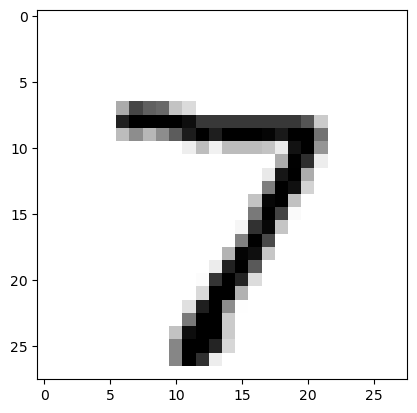

In [262]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

예측확률분포: [6.98897509e-07 6.66665945e-10 1.12164986e-10 2.04589123e-09
 3.50966728e-10 8.58197309e-05 5.79724848e-01 9.53040077e-11
 4.20188665e-01 3.24108163e-09]
라벨: 8, 예측결과: 6


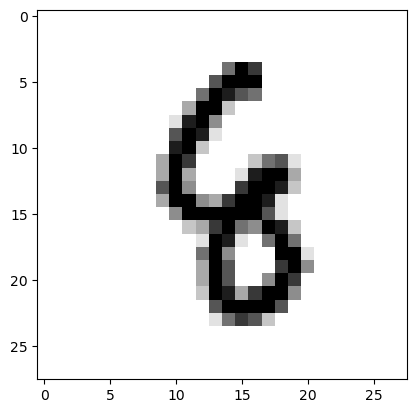

예측확률분포: [2.7523827e-11 8.1200956e-11 2.3425228e-09 1.0832562e-08 4.5292350e-07
 6.5036136e-09 8.7622402e-21 9.6725202e-01 1.4182863e-08 3.2747593e-02]
라벨: 9, 예측결과: 7


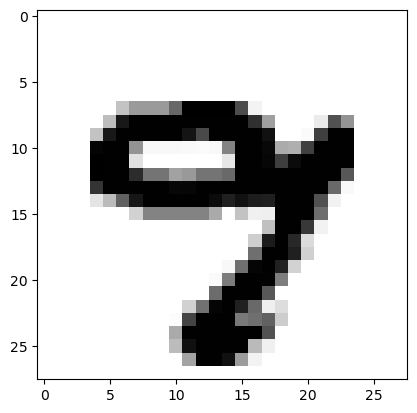

예측확률분포: [3.2284236e-04 4.2949161e-01 6.0969528e-02 5.2392815e-04 1.4822859e-05
 1.2252222e-05 6.1476886e-11 5.0859863e-01 3.0776715e-05 3.5708763e-05]
라벨: 1, 예측결과: 7


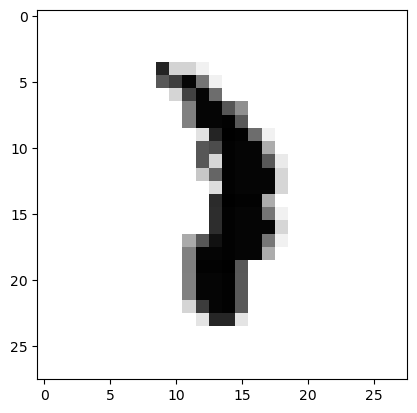

예측확률분포: [7.4927091e-14 9.8774511e-01 3.4284010e-08 2.3374849e-08 9.0499365e-05
 3.4128130e-05 5.3737642e-15 7.9358768e-05 1.4314993e-07 1.2050728e-02]
라벨: 9, 예측결과: 1


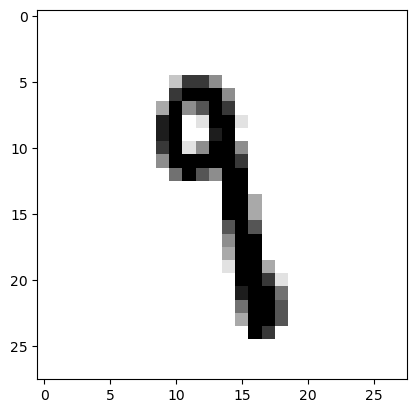

예측확률분포: [9.8774533e-10 6.3238308e-06 7.5938505e-01 4.1020103e-06 4.5738480e-07
 6.1742851e-09 1.7724689e-12 2.4060394e-01 1.0395466e-09 1.4081331e-07]
라벨: 7, 예측결과: 2


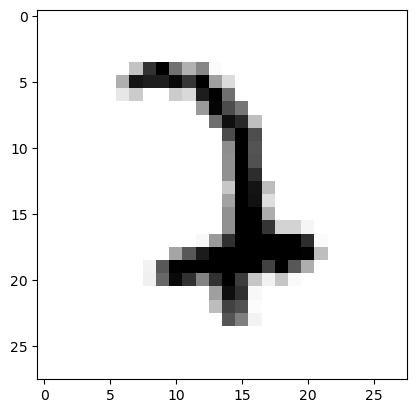

In [263]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [264]:
len(wrong_predict_list)

113

- Conv2D 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수입니다. 여기서는 16과 32를 사용했습니다. 가장 먼저 16개의 이미지 특징을, 그 뒤에 32개의 이미지 특징씩을 고려하겠다는 뜻입니다. 우리의 숫자 이미지는 사실 매우 단순한 형태의 이미지입니다. 만약 강아지 얼굴 사진이 입력 이미지라면 훨씬 디테일하고 복잡한 영상일 것입니다. 그럴 경우에는 이 특징 숫자를 늘려주는 것을 고려해 볼 수 있습니다.
- Dense 레이어의 첫 번째 인자는 분류기에 사용되는 뉴런의 숫자 입니다. 이 값이 클수록 보다 복잡한 분류기를 만들 수 있습니다. 10개의 숫자가 아닌 알파벳을 구분하고 싶다면, 대문자 26개, 소문자 26개로 총 52개의 클래스를 분류해 내야 합니다. 그래서 32보다 큰 64, 128 등을 고려해 볼 수 있을 것입니다.
- 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는 클래스 수로 지정하면 됩니다. 숫자 인식기에서는 10, 알파벳 인식기에서는 52가 되겠지요.

In [265]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=20
n_channel_2=64
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)              │ (None, 26, 26, 20)     │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 13, 13, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 11, 11, 64)     │        11,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_33 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 32)             │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,346 (247.45 KB)

 Trainable params: 63,346 (247.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8872 - loss: 0.3645
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9828 - loss: 0.0563
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9890 - loss: 0.0354
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9921 - loss: 0.0273
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9937 - loss: 0.0218
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9951 - loss: 0.0180
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9950 - loss: 0.0140
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9968 - loss: 0.0103
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9976 - loss: 0.0080
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9976 - loss: 0.0070
313/313 - 1s - 2ms/step - accuracy: 0.9895 - loss: 0.0435
test_loss: 0.043544214218854904 
test_accuracy: 0.98949998617

In [266]:
predicted_result = model.predict(x_test_reshaped) # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1) 
# argmax 주어진 np 배열에서 가장 높은 값 인덱스 반환, axis 0 열 축에서 1은 행 축에서
# 즉, 인덱스 0의 첫번째 숫자를 맞추기 위해 한 행에 10개의 숫자가 표시되는데, 그 행에서 가장 크기가 큰 인덱스를 반환
idx=0 # 첫번째 숫자
print('model.predict() 결과: ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과: ', predicted_labels[idx])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
model.predict() 결과:  [1.4617826e-09 2.5841271e-12 1.0012643e-09 4.7701750e-08 5.6163616e-09
 2.6661757e-09 7.1157385e-18 9.9999964e-01 3.6636305e-10 3.1073344e-07]
model이 추론한 가장 가능성이 높은 결과:  7


예측확률분포: [6.3054010e-02 9.3745489e-10 2.9738694e-02 3.1759409e-08 3.1698424e-01
 7.2970565e-08 3.8023132e-01 6.8187019e-11 2.0999148e-01 1.5924562e-07]
라벨: 4, 예측결과: 6


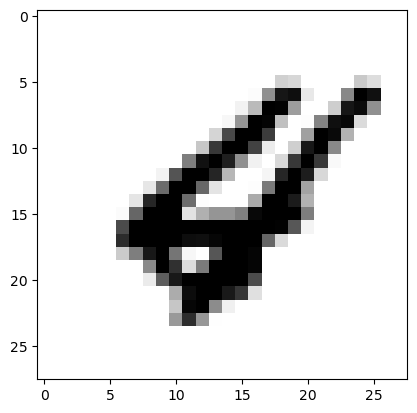

예측확률분포: [2.4729767e-12 7.1958530e-05 1.2797860e-12 5.9001100e-05 5.4168376e-09
 9.9986899e-01 7.2373774e-10 4.0184860e-09 8.1529544e-10 2.6231910e-09]
라벨: 3, 예측결과: 5


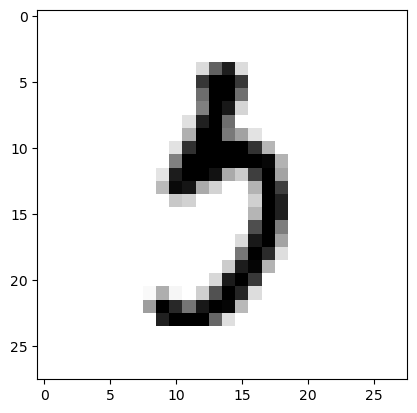

예측확률분포: [2.68676504e-05 1.24847434e-01 6.92538358e-03 3.46335316e-09
 1.80495533e-06 3.33888443e-06 6.41289830e-08 1.26943528e-03
 8.66912246e-01 1.34030797e-05]
라벨: 1, 예측결과: 8


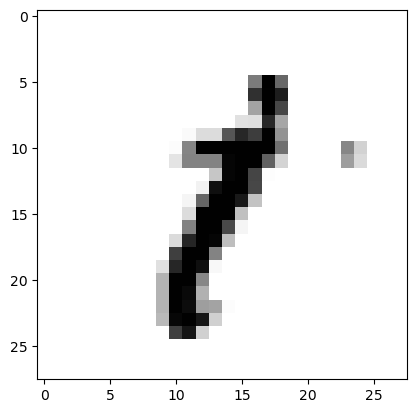

예측확률분포: [2.68676504e-05 1.24847434e-01 6.92538358e-03 3.46335316e-09
 1.80495533e-06 3.33888443e-06 6.41289830e-08 1.26943528e-03
 8.66912246e-01 1.34030797e-05]
라벨: 1, 예측결과: 8


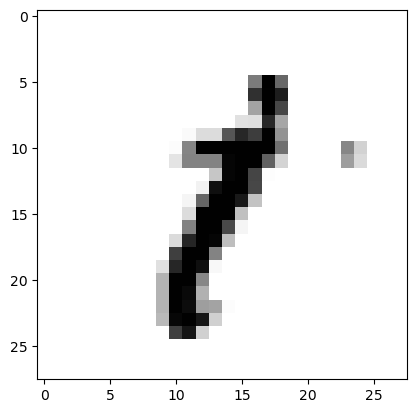

예측확률분포: [1.1248312e-12 3.7800865e-07 3.5064739e-01 1.9055058e-01 1.2408949e-04
 1.9757638e-06 2.1532502e-12 4.5866957e-01 5.8666874e-06 2.8083196e-08]
라벨: 2, 예측결과: 7


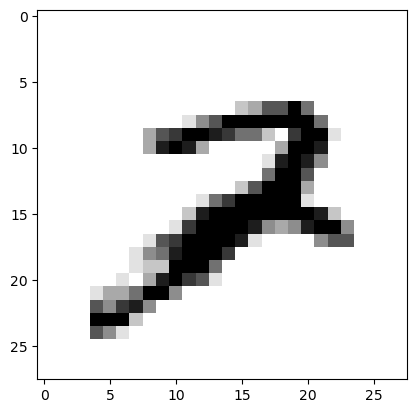

In [267]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [268]:
len(wrong_predict_list)

105

## 딥러닝 - 가위바위보 분류기

In [269]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.19.0
1.26.4


In [270]:
# mkdir -p C:\Project\PY2025\202506_deep_learning\rock_scissor_paper\rock   
# mkdir -p C:\Project\PY2025\202506_deep_learning\rock_scissor_paper\scissor
# mkdir -p C:\Project\PY2025\202506_deep_learning\rock_scissor_paper\paper

# 터미널에서 폴더 생성 기존에 있는 건 놔두고 없는 폴더만 새로 만듦.

In [271]:
# 1이라고 뜨지만 아무 작동 안됨
# import os

# file_name = "rock.zip"
# output_dir = "C:/Project/PY2025/202506_deep_learning/rock_scissor_paper/rock"
# os.system("unzip "+file_name+" -d "+output_dir)

In [272]:
import os

local_zip = './rock_scissor_paper/scissor/scissor.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./rock_scissor_paper/scissor')
zip_ref.close()

In [273]:
local_zip = './rock_scissor_paper/paper/paper.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./rock_scissor_paper/paper')
zip_ref.close()

In [274]:
local_zip = './rock_scissor_paper/rock/rock.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./rock_scissor_paper/rock')
zip_ref.close()

데이터 불러오기 + Resize 하기

In [275]:
from PIL import Image
import glob
import os
print("PIL 라이브러리 import 완료")

PIL 라이브러리 import 완료


In [276]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28*28 사이즈로 바꿔 저장
    target_size=(28, 28)
    for img in images:
        old_img=Image.open(img)
        # new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img=old_img.resize(target_size,Image.Resampling.LANCZOS)
        new_img.save(img, "JPEG")

    print(len(images), " imges resized.")

# 가위 이미지 저장된 디렉토리 아래 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper/scissor"

resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

159  images to be resized.
159  imges resized.
가위 이미지 resize 완료!


In [277]:
# 이미지 저장된 디렉토리 아래 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper/rock"

resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

132  images to be resized.
132  imges resized.
바위 이미지 resize 완료!


In [278]:
# 이미지 저장된 디렉토리 아래 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper/paper"

resize_images(image_dir_path)

print("보 이미지 resize 완료!")

123  images to be resized.
123  imges resized.
보 이미지 resize 완료!


load data

In [279]:
import numpy as np

def load_data(img_path, number_of_data=414):
    # 라벨: 가위:0, 바위:1, 보:2
    img_size=28
    color=3
    # 이미지 데이터와 라벨(0,1,2) 데이터 담을 행력(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0 # 가위
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1 # 바위
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2 # 보
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "./rock_scissor_paper"

(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0 # 0~1사이로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


학습데이터(x_train)의 이미지 개수는 414 입니다.
x_train shape: (414, 28, 28, 3)
y_train shape: (414,)


In [280]:
print(f"Before Reshape - x_train_norm_shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm_shape: {x_test_norm.shape}")

Before Reshape - x_train_norm_shape: (414, 28, 28, 3)
Before Reshape - x_test_norm_shape: (10000, 28, 28)


라벨:  0


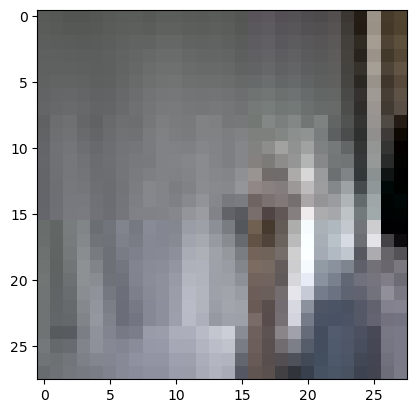

In [281]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

딥러닝 네트워크 설계하기

In [282]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=64
n_dense=128
n_train_epoch=200

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

model.summary()


Epoch 1/200


c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3248 - loss: 30.3066 
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4975 - loss: 1.4430 
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7711 - loss: 0.5526 
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8995 - loss: 0.3232 
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9715 - loss: 0.1566 
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9940 - loss: 0.0833
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9944 - loss: 0.0427
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9946 - loss: 0.0341
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0185
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9990 - loss: 0.0154
Epoch 11/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0070 
Epoch 12/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0

KeyboardInterrupt: 

In [ ]:
# 모델 시험
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=2)
print(f"train_loss: {train_loss} ")
print(f"train_accuracy: {train_accuracy}")

13/13 - 0s - 26ms/step - accuracy: 1.0000 - loss: 7.8061e-07
train_loss: 7.806144139976823e-07 
train_accuracy: 1.0


In [ ]:
# 터미널 실행
# mkdir -p C:\Project\PY2025\202506_deep_learning\rock_scissor_paper\test\rock
# mkdir -p C:\Project\PY2025\202506_deep_learning\rock_scissor_paper\test\scissor
# mkdir -p C:\Project\PY2025\202506_deep_learning\rock_scissor_paper\test\paper

In [ ]:
local_zip = './rock_scissor_paper/test/scissor/scissor.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./rock_scissor_paper/test/scissor')
zip_ref.close()

In [ ]:
local_zip = './rock_scissor_paper/test/rock/rock.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./rock_scissor_paper/test/rock')
zip_ref.close()

In [ ]:
local_zip = './rock_scissor_paper/test/paper/paper.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./rock_scissor_paper/test/paper')
zip_ref.close()

In [ ]:
image_dir_path = "./rock_scissor_paper/test/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

52  images to be resized.
52  imges resized.
바위 이미지 resize 완료!


In [ ]:
image_dir_path = "./rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

52  images to be resized.
52  imges resized.
가위 이미지 resize 완료!


In [ ]:
image_dir_path = "./rock_scissor_paper/test/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

52  images to be resized.
52  imges resized.
보 이미지 resize 완료!


In [ ]:
def load_data(img_path, number_of_data=156):
    # 라벨: 가위:0, 바위:1, 보:2
    img_size=28
    color=3
    # 이미지 데이터와 라벨(0,1,2) 데이터 담을 행력(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0 # 가위
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1 # 바위
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2 # 보
        idx=idx+1

    print("시험데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "./rock_scissor_paper/test"

(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0 # 0~1사이로 정규화

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

시험데이터(x_test)의 이미지 개수는 156 입니다.
x_test shape: (156, 28, 28, 3)
y_test shape: (156,)


In [ ]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

5/5 - 0s - 39ms/step - accuracy: 0.3333 - loss: 70.1890
test_loss: 70.18901824951172 
test_accuracy: 0.3333333432674408


In [ ]:
predicted_result = model.predict(x_test) # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1) 
# argmax 주어진 np 배열에서 가장 높은 값 인덱스 반환, axis 0 열 축에서 1은 행 축에서
# 즉, 인덱스 0의 첫번째 숫자를 맞추기 위해 한 행에 10개의 숫자가 표시되는데, 그 행에서 가장 크기가 큰 인덱스를 반환
idx=30 # 첫번째 숫자
print('model.predict() 결과: ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과: ', predicted_labels[idx])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
model.predict() 결과:  [0. 1. 0.]
model이 추론한 가장 가능성이 높은 결과:  1


In [ ]:
predicted_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

라벨:  0


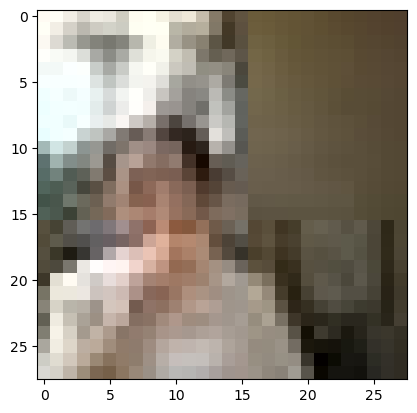

In [ ]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

예측확률분포: [5.8535496e-11 9.9999821e-01 1.7917158e-06]
라벨: 0, 예측결과: 1


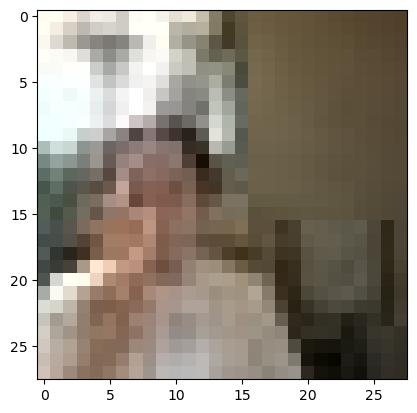

예측확률분포: [1.2779762e-09 9.9999905e-01 9.8793396e-07]
라벨: 2, 예측결과: 1


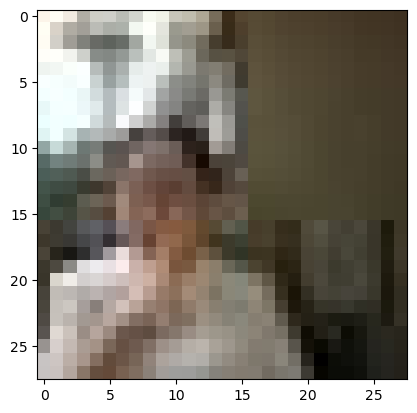

예측확률분포: [6.1357146e-09 9.9999845e-01 1.5118918e-06]
라벨: 0, 예측결과: 1


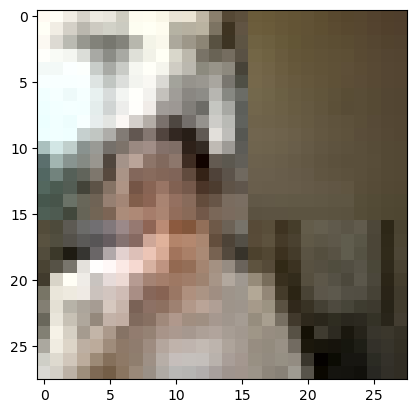

예측확률분포: [1.5854251e-09 9.9999976e-01 1.9112466e-07]
라벨: 2, 예측결과: 1


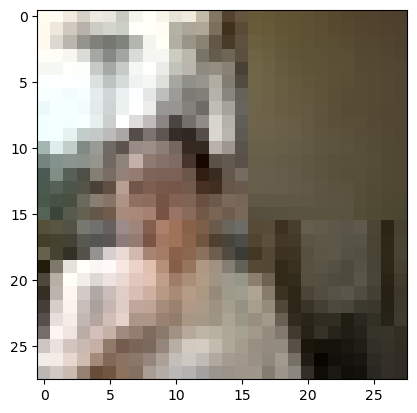

예측확률분포: [1.5954414e-10 1.0000000e+00 3.4893034e-08]
라벨: 2, 예측결과: 1


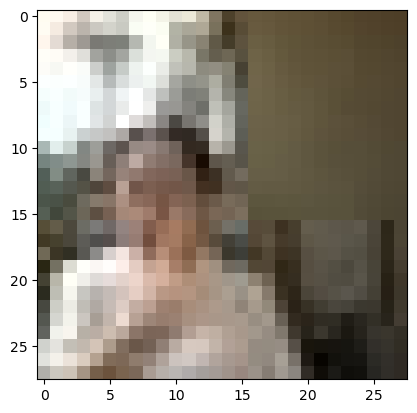

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

#### LMS 상 이미지로 재테스트 진행

In [ ]:
# mkdir -p C:\Project\PY2025\202506_deep_learning\rock_scissor_paper\test2\rock
# mkdir -p C:\Project\PY2025\202506_deep_learning\rock_scissor_paper\test2\scissor
# mkdir -p C:\Project\PY2025\202506_deep_learning\rock_scissor_paper\test2\paper

In [ ]:
image_dir_path = "./rock_scissor_paper/test2/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

100  images to be resized.
100  imges resized.
바위 이미지 resize 완료!


In [ ]:
image_dir_path = "./rock_scissor_paper/test2/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

100  images to be resized.
100  imges resized.
가위 이미지 resize 완료!


In [ ]:
image_dir_path = "./rock_scissor_paper/test2/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  imges resized.
보 이미지 resize 완료!


In [ ]:
def load_data(img_path, number_of_data=300):
    # 라벨: 가위:0, 바위:1, 보:2
    img_size=28
    color=3
    # 이미지 데이터와 라벨(0,1,2) 데이터 담을 행력(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0 # 가위
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1 # 바위
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2 # 보
        idx=idx+1

    print("시험데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "./rock_scissor_paper/test2"

(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0 # 0~1사이로 정규화

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

시험데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [ ]:
x_test.shape

(300, 28, 28, 3)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=128
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

model.summary()

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3467 - loss: 1.1098
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3964 - loss: 1.0639 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5778 - loss: 0.9994
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5795 - loss: 0.9386
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6415 - loss: 0.8200 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7425 - loss: 0.7493
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8215 - loss: 0.6336
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8314 - loss: 0.5336 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8975 - loss: 0.4144
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9111 - loss: 0.3369


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 324,011 (1.24 MB)

 Trainable params: 108,003 (421.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 216,008 (843.79 KB)

In [ ]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - 17ms/step - accuracy: 0.2767 - loss: 1.9380
test_loss: 1.9380441904067993 
test_accuracy: 0.27666667103767395


In [ ]:
predicted_result = model.predict(x_test) # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1) 
# argmax 주어진 np 배열에서 가장 높은 값 인덱스 반환, axis 0 열 축에서 1은 행 축에서
# 즉, 인덱스 0의 첫번째 숫자를 맞추기 위해 한 행에 10개의 숫자가 표시되는데, 그 행에서 가장 크기가 큰 인덱스를 반환
idx=30 # 첫번째 숫자
print('model.predict() 결과: ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과: ', predicted_labels[idx])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
model.predict() 결과:  [0. 1. 0.]
model이 추론한 가장 가능성이 높은 결과:  1


In [ ]:
predicted_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [ ]:
len(predicted_labels)

300

In [ ]:
print(f"Before Reshape - x_train_norm_shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3) # 데이터갯수에 -1을 쓰면 reshape시 자동 계산
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print(f"After Reshape - x_train_norm_shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_norm shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm_shape: (414, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_norm_shape: (414, 28, 28, 3)
After Reshape - x_test_norm shape: (300, 28, 28, 3)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=256
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

model.summary()

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3132 - loss: 1.0964 
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5012 - loss: 1.0180 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6540 - loss: 0.8987
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7545 - loss: 0.7493 
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8395 - loss: 0.5350 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8667 - loss: 0.4178 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9368 - loss: 0.2882 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9304 - loss: 0.2454 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9446 - loss: 0.2129 
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9784 - loss: 0.1325 


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)              │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 632,747 (2.41 MB)

 Trainable params: 210,915 (823.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 421,832 (1.61 MB)

In [ ]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - 18ms/step - accuracy: 0.3867 - loss: 2.9358
test_loss: 2.935823678970337 
test_accuracy: 0.3866666555404663


In [ ]:
predicted_result = model.predict(x_test) # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1) 
# argmax 주어진 np 배열에서 가장 높은 값 인덱스 반환, axis 0 열 축에서 1은 행 축에서
# 즉, 인덱스 0의 첫번째 숫자를 맞추기 위해 한 행에 10개의 숫자가 표시되는데, 그 행에서 가장 크기가 큰 인덱스를 반환
idx=30 # 첫번째 숫자
print('model.predict() 결과: ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과: ', predicted_labels[idx])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
model.predict() 결과:  [0. 1. 0.]
model이 추론한 가장 가능성이 높은 결과:  1


In [ ]:
predicted_labels

array([2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [ ]:
len(predicted_labels)

300